# Importing libraries and dataset




In [1]:
import scipy.io as sio
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import torch.utils.data as dataloader
import matplotlib.pyplot as plt
import time
import os
import shutil
import copy
import random
from random import shuffle
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T

In [2]:
dataset_gtsrb_t = torchvision.datasets.GTSRB('/content/GTSRB_root', download=True)

100%|██████████| 187490228/187490228 [00:01<00:00, 103958920.06it/s]


Extracting /content/GTSRB_root/gtsrb/GTSRB-Training_fixed.zip to /content/GTSRB_root/gtsrb


In [3]:
print(len(dataset_gtsrb_t))

26640


In [4]:
torch.manual_seed(0)
np.random.seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Understanding Data

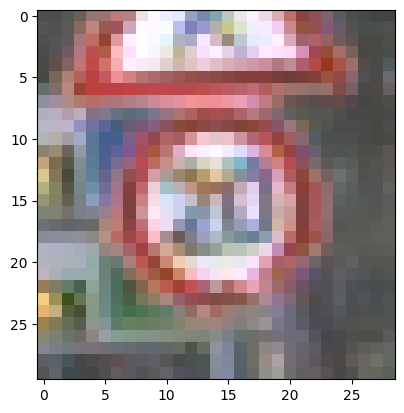

In [5]:
plt.imshow(dataset_gtsrb_t[0][0])

In [6]:
num_elem = np.zeros((43,), dtype=int)
for _,target in dataset_gtsrb_t:
  match target:
    case 0:
      num_elem[0] = num_elem[0] + 1
    case 1:
      num_elem[1] = num_elem[1] + 1
    case 2:
      num_elem[2] = num_elem[2] + 1
    case 3:
      num_elem[3] = num_elem[3] + 1
    case 4:
      num_elem[4] = num_elem[4] + 1
    case 5:
      num_elem[5] = num_elem[5] + 1
    case 6:
      num_elem[6] = num_elem[6] + 1
    case 7:
      num_elem[7] = num_elem[7] + 1
    case 8:
      num_elem[8] = num_elem[8] + 1
    case 9:
      num_elem[9] = num_elem[9] + 1
    case 10:
      num_elem[10] = num_elem[10] + 1
    case 11:
      num_elem[11] = num_elem[11] + 1
    case 12:
      num_elem[12] = num_elem[12] + 1
    case 13:
      num_elem[13] = num_elem[13] + 1
    case 14:
      num_elem[14] = num_elem[14] + 1
    case 15:
      num_elem[15] = num_elem[15] + 1
    case 16:
      num_elem[16] = num_elem[16] + 1
    case 17:
      num_elem[17] = num_elem[17] + 1
    case 18:
      num_elem[18] = num_elem[18] + 1
    case 19:
      num_elem[19] = num_elem[19] + 1
    case 20:
      num_elem[20] = num_elem[20] + 1
    case 21:
      num_elem[21] = num_elem[21] + 1
    case 22:
      num_elem[22] = num_elem[22] + 1
    case 23:
      num_elem[23] = num_elem[23] + 1
    case 24:
      num_elem[24] = num_elem[24] + 1
    case 25:
      num_elem[25] = num_elem[25] + 1
    case 26:
      num_elem[26] = num_elem[26] + 1
    case 27:
      num_elem[27] = num_elem[27] + 1
    case 28:
      num_elem[28] = num_elem[28] + 1
    case 29:
      num_elem[29] = num_elem[29] + 1
    case 30:
      num_elem[30] = num_elem[30] + 1
    case 31:
      num_elem[31] = num_elem[1] + 1
    case 32:
      num_elem[32] = num_elem[32] + 1
    case 33:
      num_elem[33] = num_elem[33] + 1
    case 34:
      num_elem[34] = num_elem[34] + 1
    case 35:
      num_elem[35] = num_elem[35] + 1
    case 36:
      num_elem[36] = num_elem[36] + 1
    case 37:
      num_elem[37] = num_elem[37] + 1
    case 38:
      num_elem[38] = num_elem[38] + 1
    case 39:
      num_elem[39] = num_elem[39] + 1
    case 40:
      num_elem[40] = num_elem[40] + 1
    case 41:
      num_elem[41] = num_elem[41] + 1
    case 42:
      num_elem[42] = num_elem[42] + 1

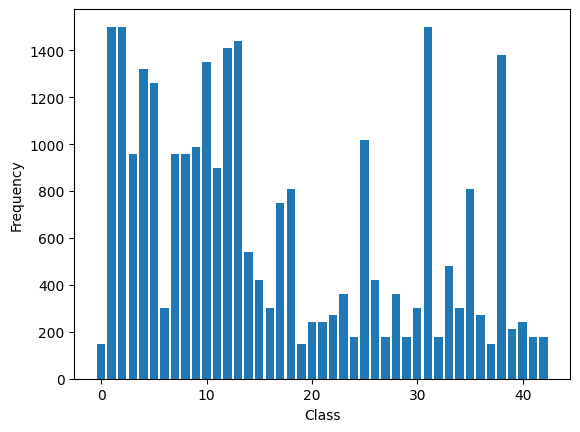

In [7]:
y= num_elem
x= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Class')
plt.ylabel('Frequency')

plt.show()

In [8]:
print(num_elem)

[ 150 1500 1500  960 1320 1260  300  960  960  990 1350  900 1410 1440
  540  420  300  750  810  150  240  240  270  360  180 1020  420  180
  360  180  300 1501  180  480  300  810  270  150 1380  210  240  180
  180]


we can see that there are more classes with less occurrences so we will try to increase properly the number of images with data augmentation tecnique

In [9]:
print('classes with less than 200 elements:')
for i in range(43):
  if num_elem[i] < 200:
     print(i)

print('classes with number of elements between 200 and 300:')
for i in range(43):
  if num_elem[i] > 200 and num_elem[i] < 300:
     print(i)

print('classes with number of elements between 300 and 400:')
for i in range(43):
  if num_elem[i] >= 300 and num_elem[i] < 400:
     print(i)

print('classes with number of elements between 400 and 500:')
for i in range(43):
  if num_elem[i] >= 400 and num_elem[i] < 500:
     print(i)

print('classes with number of elements between 500 and 820:')
for i in range(43):
  if num_elem[i] >= 500 and num_elem[i] < 820:
     print(i)

classes with less than 200 elements:
0
19
24
27
29
32
37
41
42
classes with number of elements between 200 and 300:
20
21
22
36
39
40
classes with number of elements between 300 and 400:
6
16
23
28
30
34
classes with number of elements between 400 and 500:
15
26
33
classes with number of elements between 500 and 820:
14
17
18
35


so we divided the images in 6 parts:
  - classes with less of 200 occurrences
  - classes with elements between 200 and 300
  - classes with elements between 300 and 400
  - classes with elements between 400 and 500
  - classes with elements between 500 and 820
  - classes with more than 820 occurrences

In this way we will increase the number of images basing on different groups.
We decided to increase:
  - 7 times the number of occurrences for the first group
  - 6 times the number of occurrences for the second group
  - 4 times the number of occurrences for the third group
  - 3 times the number of occurrences for the fourth group
  - 2 times the number of occurrences for the fifth group

the last group doesn't need to be increased

Let's try some rotation

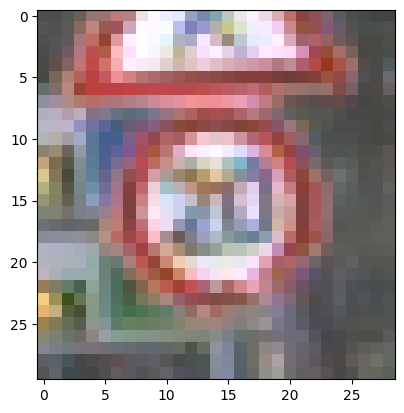

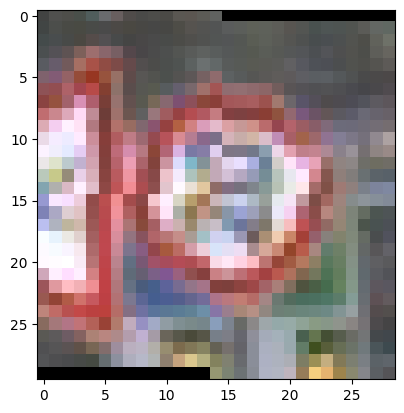

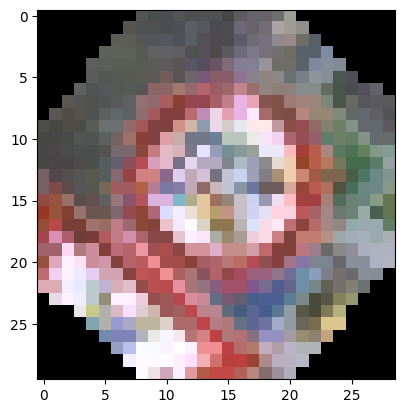

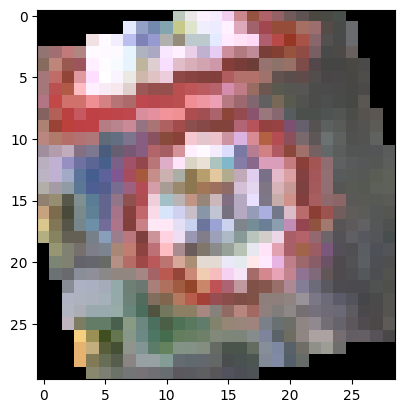

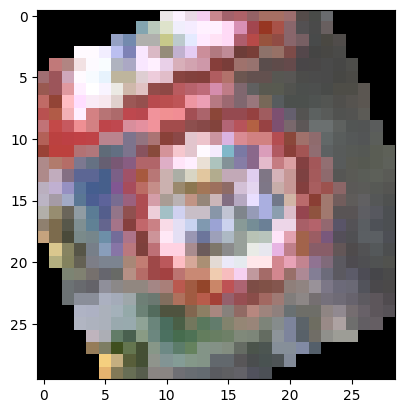

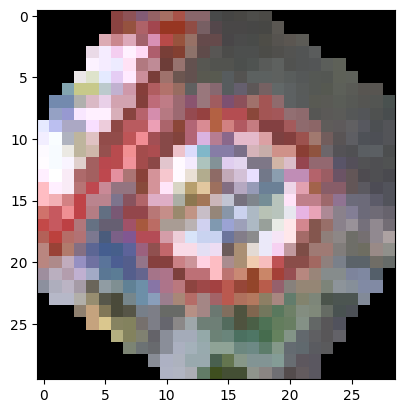

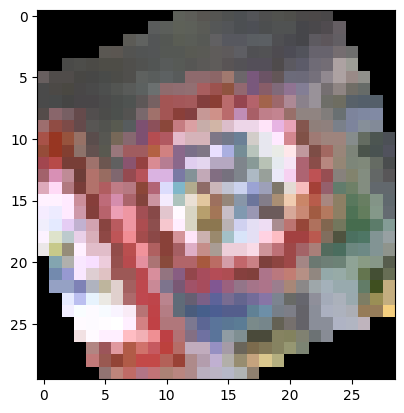

In [10]:
import torchvision.transforms as T
plt.imshow(dataset_gtsrb_t[0][0])
plt.show()
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(dataset_gtsrb_t[0][0]) for _ in range(6)]
for imgs in rotated_imgs:
  plt.imshow(imgs)
  plt.show()


# Splitting in train and validation

we will split the dataset in train and validation with a percentage of 70% and 30% for training our network

In [11]:
train_set, val_set = torch.utils.data.random_split(dataset_gtsrb_t, [18648, 7992])

checking if the spilt was done correctly

In [12]:
print(len(train_set))
print(len(val_set))

18648
7992


# Data Preparation

now we will try some rotations for the data augmentation. At the same time we resized and normalized the images.



In [13]:
vect = []

rotater = T.RandomRotation(degrees=(225, 225))

vect.append(rotater(dataset_gtsrb_t[0][0]))
vect.append(rotater(dataset_gtsrb_t[3][0]))


In [ ]:
resize = T.Resize((60,60))
convert_tensor = transforms.ToTensor()
rotater45 = T.RandomRotation(degrees=(225, 225))
norm = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
n_im = norm(convert_tensor(np.flip(resize(dataset_gtsrb_t[200][0]),(0,1)).copy()))

print(n_im.size())

torch.Size([3, 60, 60])


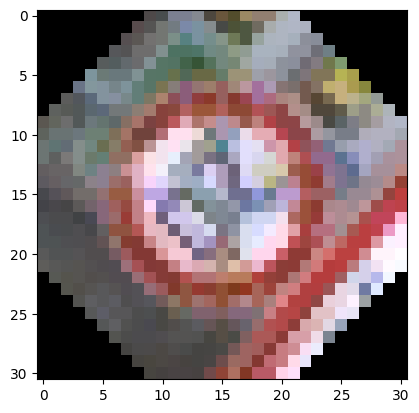

In [ ]:
plt.imshow(vect[1])

Let's apply the normalization, augmentation and resizing on the train an validation images

In [14]:
from PIL import Image as im
train_images = []
train_labels = []

convert_tensor = transforms.ToTensor()
rotater45 = T.RandomRotation(degrees=(45, 45))
rotater135 = T.RandomRotation(degrees=(135, 135))
rotater225 = T.RandomRotation(degrees=(225, 225))
resize = T.Resize((60,60))
norm = transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))

for images,targets in train_set:
  if targets == 0 or targets == 19 or targets == 24 or targets == 29 or targets == 32 or targets == 37 or targets == 41 or targets == 42:
    train_images.append(norm(convert_tensor(resize(images))))
    train_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flip(resize(images), (0, 1)).copy())))
    train_images.append(norm(convert_tensor(rotater45(resize(images)).copy())))
    train_images.append(norm(convert_tensor(rotater135(resize(images)).copy())))
    train_images.append(norm(convert_tensor(rotater225(resize(images)).copy())))
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
  elif targets == 20 or targets == 21 or targets == 22 or targets == 36 or targets == 39 or targets == 40:
    train_images.append(norm(convert_tensor(resize(images))))
    train_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flip(resize(images), (0, 1)).copy())))
    train_images.append(norm(convert_tensor(rotater45(resize(images)).copy())))
    train_images.append(norm(convert_tensor(rotater135(resize(images)).copy())))
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
  elif targets == 6 or targets == 16 or targets == 23 or targets == 28 or targets == 30 or targets == 34:
    train_images.append(norm(convert_tensor(resize(images))))
    train_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flip(resize(images), (0, 1)).copy())))
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
  elif targets == 15 or targets == 26 or targets == 33:
    train_images.append(norm(convert_tensor(resize(images))))
    train_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    train_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    train_labels.append(targets)
    train_labels.append(targets)
    train_labels.append(targets)
  elif targets == 14 or targets == 17 or targets == 18 or targets == 35:
    train_images.append(norm(convert_tensor(resize(images))))
    train_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    train_labels.append(targets)
    train_labels.append(targets)
  else:
    train_images.append(norm(convert_tensor(resize(images))))
    train_labels.append(targets)



val_images = []
val_labels = []

for images,targets in val_set:
  if targets == 0 or targets == 19 or targets == 24 or targets == 29 or targets == 32 or targets == 37 or targets == 41 or targets == 42:
    val_images.append(norm(convert_tensor(resize(images))))
    val_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flip(resize(images), (0, 1)).copy())))
    val_images.append(norm(convert_tensor(rotater45(resize(images)).copy())))
    val_images.append(norm(convert_tensor(rotater135(resize(images)).copy())))
    val_images.append(norm(convert_tensor(rotater225(resize(images)).copy())))
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
  elif targets == 20 or targets == 21 or targets == 22 or targets == 36 or targets == 39 or targets == 40:
    val_images.append(norm(convert_tensor(resize(images))))
    val_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flip(resize(images), (0, 1)).copy())))
    val_images.append(norm(convert_tensor(rotater45(resize(images)).copy())))
    val_images.append(norm(convert_tensor(rotater135(resize(images)).copy())))
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
  elif targets == 6 or targets == 16 or targets == 23 or targets == 28 or targets == 30 or targets == 34:
    val_images.append(norm(convert_tensor(resize(images))))
    val_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flip(resize(images), (0, 1)).copy())))
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
  elif targets == 15 or targets == 26 or targets == 33:
    val_images.append(norm(convert_tensor(resize(images))))
    val_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    val_images.append(norm(convert_tensor(np.flipud(resize(images)).copy())))
    val_labels.append(targets)
    val_labels.append(targets)
    val_labels.append(targets)
  elif targets == 14 or targets == 17 or targets == 18 or targets == 35:
    val_images.append(norm(convert_tensor(resize(images))))
    val_images.append(norm(convert_tensor(np.fliplr(resize(images)).copy())))
    val_labels.append(targets)
    val_labels.append(targets)
  else:
    val_images.append(norm(convert_tensor(resize(images))))
    val_labels.append(targets)


In [15]:
print(len(train_images))
print(len(train_labels))

37236
37236


In [16]:
print(len(val_images))
print(len(val_labels))

16164
16164


how we can see the percentage is the same (70 for the train 30 for validation)


# Defining Datasets, CNN and Dataloaders

we will define the 2 datasets for train and validation

In [17]:
class MyDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]



        return x, y

    def __len__(self):
        return len(self.targets)

In [18]:
train_data = MyDataset(train_images,train_labels)
val_data = MyDataset(val_images,val_labels)

now we will define a CNN

In [19]:
class CNNfdp(nn.Module):
  def __init__(self,num_classes):
    super(CNNfdp, self).__init__()
    self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=128, kernel_size=3, padding=2)
    self.conv_layer2 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=2)
    self.conv_layer3 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=2)

    self.maxpool_lyr = nn.MaxPool2d(kernel_size=2, stride=2)
    self.dropout_lyr = nn.Dropout(0.25)

    self.fc1 = nn.Linear(41472, 128)
    self.fc_final = nn.Linear(128, num_classes)


  def forward(self, x):
    x = self.maxpool_lyr(F.relu(self.conv_layer1(x)))
    x = self.maxpool_lyr(F.relu(self.conv_layer2(x)))
    x = self.maxpool_lyr(F.relu(self.conv_layer3(x)))
    x= x.view(-1, 41472)
    x = F.relu(self.fc1(x))
    x = self.dropout_lyr(x)
    x = self.fc_final(x)
    return x

the last thing is the dataloader

In [20]:
Batch_size = 16


dataloader_train = DataLoader(train_data, batch_size=Batch_size)
dataloader_val = DataLoader(val_data, batch_size=Batch_size)

# Training

In [22]:
learning_rate= 0.01
startEpoch =0
numEpochs =15
model = CNNfdp(43).cuda()
criterion = nn.CrossEntropyLoss()
index =0
best_acc = 0
best_loss = 1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
for epochs in range(startEpoch,numEpochs + 1):
  modelLoss_train = 0.0
  modelAcc_train = 0.0
  totalSize = 0
  for inputs,target in dataloader_train:
    optimizer.zero_grad()
    inputs = inputs.type(torch.FloatTensor).cuda()
    target = target.cuda()
    output = model(inputs)
    outp,preds = torch.max(output,1)
    loss = criterion(output,target)

    modelLoss_train += loss.item()*inputs.size(0)
    totalSize += inputs.size(0)
    modelAcc_train += torch.sum(preds == target).item()
    #print(preds)
    loss.backward()
    optimizer.step()
    index += 1

  modelLoss_epoch_train = modelLoss_train/totalSize
  modelAcc_epoch_train = modelAcc_train/totalSize

  #salvataggio stato
  torch.save(model.state_dict(), '/train_weights.pth')
  model.eval()

  totalSize_val = 0
  modelLoss_val = 0.0
  modelAcc_val = 0.0

  for inputs,labels in dataloader_val:
        inputs = inputs.type(torch.FloatTensor).cuda()
        labels = labels.cuda()

        y = model(inputs)
        outp, preds = torch.max(y,1)
        lossCNN = criterion(y,labels)

        modelLoss_val += lossCNN.item()*inputs.size(0)
        totalSize_val += inputs.size(0)
        modelAcc_val += torch.sum(preds == labels.data).item()

  modelLoss_epoch_val = modelLoss_val/totalSize_val
  modelAcc_epoch_val = modelAcc_val/totalSize_val
  print('Epoch[%d] Train Acc: %.4f , Loss: %.4f ; Validation Acc: %.4f , Loss: %.4f'%(epochs, modelAcc_epoch_train, modelLoss_epoch_train, modelAcc_epoch_val, modelLoss_epoch_val));

  if(modelAcc_epoch_val > best_acc) or (modelAcc_epoch_val == best_acc and modelLoss_epoch_val < best_loss):
        print('..... Saving best weights ....')
        best_acc = modelAcc_epoch_val
        best_loss = modelLoss_epoch_val
        best_epoca = epochs

        torch.save(model.state_dict(), '/content/best_model_weights.pth')

  with open('/content/lossVal.txt', "a") as file_object:
        file_object.write(str(modelLoss_epoch_val)+ '\n')

  with open('/content/AccVal.txt',"a") as file_object:
        file_object.write(str(modelAcc_epoch_val)+ '\n')

  with open('/content/lossTrain.txt', "a") as file_object:
        file_object.write(str(modelLoss_epoch_train)+ '\n')

  with open('/content/AccTrain.txt',"a") as file_object:
        file_object.write(str(modelAcc_epoch_train)+ '\n')

Epoch[0] Train Acc: 0.2023 , Loss: 2.7859 ; Validation Acc: 0.3984 , Loss: 1.8118
..... Saving best weights ....
Epoch[1] Train Acc: 0.5954 , Loss: 1.2107 ; Validation Acc: 0.7471 , Loss: 0.7555
..... Saving best weights ....
Epoch[2] Train Acc: 0.8297 , Loss: 0.5229 ; Validation Acc: 0.8886 , Loss: 0.3597
..... Saving best weights ....
Epoch[3] Train Acc: 0.9244 , Loss: 0.2408 ; Validation Acc: 0.9327 , Loss: 0.2165
..... Saving best weights ....
Epoch[4] Train Acc: 0.9640 , Loss: 0.1221 ; Validation Acc: 0.9642 , Loss: 0.1307
..... Saving best weights ....
Epoch[5] Train Acc: 0.9840 , Loss: 0.0596 ; Validation Acc: 0.9698 , Loss: 0.1155
..... Saving best weights ....
Epoch[6] Train Acc: 0.9906 , Loss: 0.0359 ; Validation Acc: 0.9703 , Loss: 0.1106
..... Saving best weights ....
Epoch[7] Train Acc: 0.9911 , Loss: 0.0336 ; Validation Acc: 0.9764 , Loss: 0.1026
..... Saving best weights ....
Epoch[8] Train Acc: 0.9937 , Loss: 0.0251 ; Validation Acc: 0.9779 , Loss: 0.0988
..... Saving b

We can see our loss and Accouracy

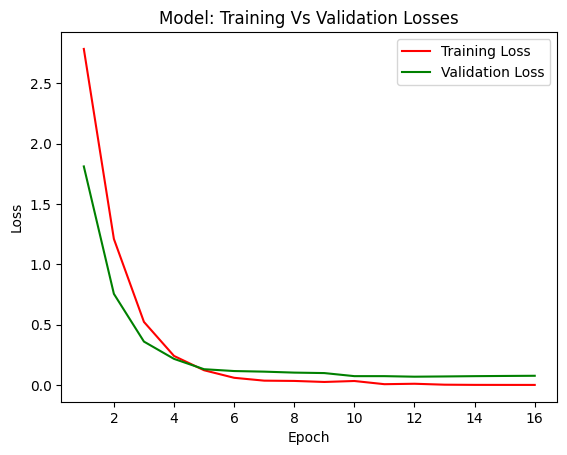

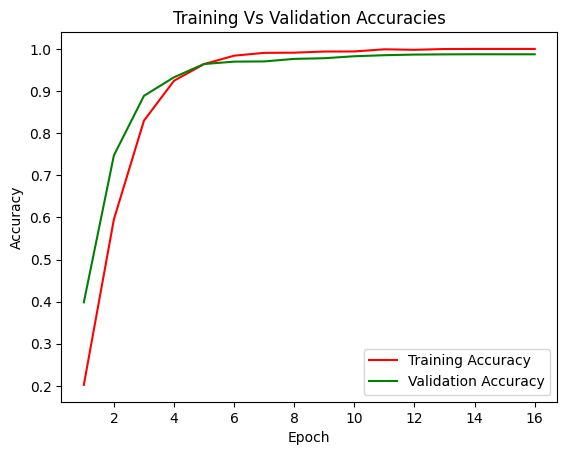

In [34]:

lossModel_Train = []
lossModel_val = []
accModel_Train = []
accModel_val = []

WeightPath = '/content/'
file = open(WeightPath + 'lossTrain.txt', 'r')
Testo = file.readlines()
for element in Testo:
  lossModel_Train.append(float(element))

file = open(WeightPath + 'lossVal.txt', 'r')
Testo = file.readlines()
for element in Testo:
  lossModel_val.append(float(element))

plt.figure()
plt.title("Model: Training Vs Validation Losses")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(list(range(1,len(lossModel_Train)+1)), lossModel_Train, color='r', label="Training Loss")
plt.plot(list(range(1, len(lossModel_val)+1)), lossModel_val, color='g', label="Validation Loss")
plt.legend()
plt.savefig(WeightPath + 'LossTrainVal.png')

file = open(WeightPath + 'AccTrain.txt', 'r')
Testo = file.readlines()
for element in Testo:
  accModel_Train.append(float(element))

file = open(WeightPath + 'AccVal.txt', 'r')
Testo = file.readlines()
for element in Testo:
  accModel_val.append(float(element))

plt.figure()
plt.title("Training Vs Validation Accuracies")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(list(range(1, len(accModel_Train)+1)), accModel_Train, color='r', label="Training Accuracy")
plt.plot(list(range(1, len(accModel_val)+1)), accModel_val, color='g', label="Validation Accuracy")
plt.legend()
plt.savefig(WeightPath + 'AccTrainVal.png')

# Testing

Now we will download the test

In [24]:
test_gtsrb = torchvision.datasets.GTSRB('/content/GTSRB_root', download=True, split='test')

100%|██████████| 88978620/88978620 [00:00<00:00, 102246521.41it/s]


Extracting /content/GTSRB_root/gtsrb/GTSRB_Final_Test_Images.zip to /content/GTSRB_root/gtsrb


100%|██████████| 99620/99620 [00:00<00:00, 2370206.34it/s]

Extracting /content/GTSRB_root/gtsrb/GTSRB_Final_Test_GT.zip to /content/GTSRB_root/gtsrb


In [25]:
print(len(test_gtsrb))

12630


Let's apply on test set each operation that we did on train

In [26]:
images_test = []
labels_test = []

for images,targets in test_gtsrb:
  images_test.append(norm(convert_tensor(resize(images))))
  labels_test.append(targets)

Now we will create Dataset and Dataloader for the test

In [27]:
test_data = MyDataset(images_test,labels_test)

In [28]:
dataloader_test = DataLoader(test_data, batch_size=Batch_size)

Now we can use the cnn and give it our test

In [30]:
model_best = CNNfdp(43)
model_best.load_state_dict(torch.load('/content/best_model_weights.pth'))
model_best.eval()

CNNfdp(
  (conv_layer1): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv_layer2): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (conv_layer3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(2, 2))
  (maxpool_lyr): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout_lyr): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=41472, out_features=128, bias=True)
  (fc_final): Linear(in_features=128, out_features=43, bias=True)
)

In [33]:
totalSize_test = 0
modelAcc_test = 0.0

for inputs,labels in dataloader_test:
        inputs = inputs.type(torch.FloatTensor).cuda()
        labels = labels.cuda()

        y = model(inputs)
        outp, preds = torch.max(y,1)
        lossCNN = criterion(y,labels)

        totalSize_test += inputs.size(0)
        modelAcc_test += torch.sum(preds == labels.data).item()

modelAcc_epoch_test = modelAcc_test/totalSize_test
print('Acc : %.4f'%modelAcc_epoch_test)

Acc : 0.8481
